# Introduction to the Project:

### We will look at a few ways of analyzing the risk of a stock, based on its previous performance history.We will also be predicting future stock prices through a Monte Carlo method!

We'll be answering the following questions along the way:

1) What was the change in price of the stock over time?

2) What was the daily return of the stock on average?

3) What was the moving average of the various stocks?

4) What was the correlation between different stocks' closing prices?

5) What was the correlation between different stocks' daily returns?

6) How much value do we put at risk by investing in a particular stock?

7) How can we attempt to predict future stock behavior?

# Basic Analysis of Stock Information

In [1]:
#Let's go ahead and start with some imports
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader import DataReader, wb

# For time stamps
from datetime import datetime

# For division
from __future__ import division

Let's use Yahoo and pandas to grab some data for some tech stocks.

In [2]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL','GOOG','MSFT','AMZN']

# Set up End and Start times for data grab
end = datetime.now()

start = datetime(end.year - 1, end.month, end.day)       # end.year-1 meaning from one year ago 

In [3]:
for stock in tech_list:
    globals()[stock] = DataReader(stock,'yahoo',start,end)

In [4]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-08-17,160.710007,157.839996,160.520004,157.860001,27940600.0,155.508698
2017-08-18,159.500000,156.720001,157.860001,157.500000,27428100.0,155.154068
2017-08-21,157.889999,155.110001,157.500000,157.210007,26368500.0,154.868378
2017-08-22,160.000000,158.020004,158.229996,159.779999,21604600.0,157.400101
2017-08-23,160.470001,158.880005,159.070007,159.979996,19399100.0,157.597107


In [5]:
# Globals() creates all ticker variables to Global Variables

Let's go ahead and play aorund with the AAPL DataFrame to get a feel for the data

In [6]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,176.298775,173.557155,174.856759,174.987234,2.973205e+07,173.470643
std,13.589021,13.644718,13.522699,13.724185,1.261102e+07,14.294376
min,151.830002,149.160004,149.990005,150.550003,1.251390e+07,148.307571
25%,166.919998,163.479996,164.800003,164.940002,2.093360e+07,163.732193
50%,174.990005,172.449997,173.500000,173.970001,2.621220e+07,171.981339
75%,187.199997,184.279999,185.419998,185.500000,3.500530e+07,184.811844
max,217.940002,213.169998,213.440002,217.580002,8.659380e+07,217.580002


In [7]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2017-08-17 to 2018-08-17
Data columns (total 6 columns):
High         253 non-null float64
Low          253 non-null float64
Open         253 non-null float64
Close        253 non-null float64
Volume       253 non-null float64
Adj Close    253 non-null float64
dtypes: float64(6)
memory usage: 13.8 KB


Now that we've seen the DataFrame, let's go ahead and plot out the volume and closing price of the stocks

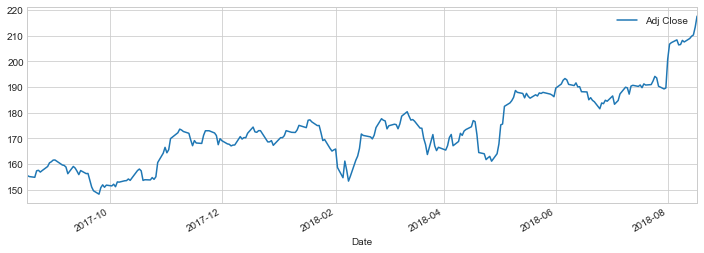

In [8]:
AAPL['Adj Close'].plot(legend=True, figsize = (12,4))
plt.show()

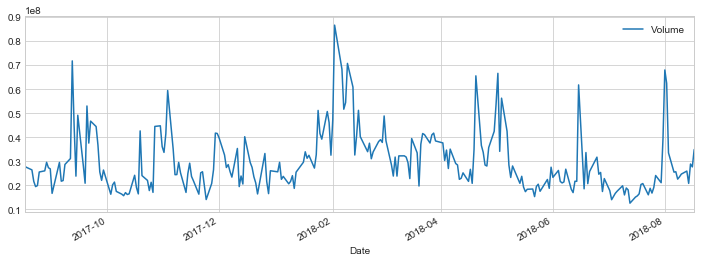

In [9]:
AAPL['Volume'].plot(legend=True, figsize = (12,4))
plt.show()

### Let's go ahead and plot out several moving averages

In [10]:
ma_day=[10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    AAPL[column_name]=pd.rolling_mean(AAPL['Adj Close'],ma)

C:\Users\ARJ\Anaconda2\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
  """
C:\Users\ARJ\Anaconda2\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).mean()
  """
C:\Users\ARJ\Anaconda2\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=50,center=False).mean()
  """


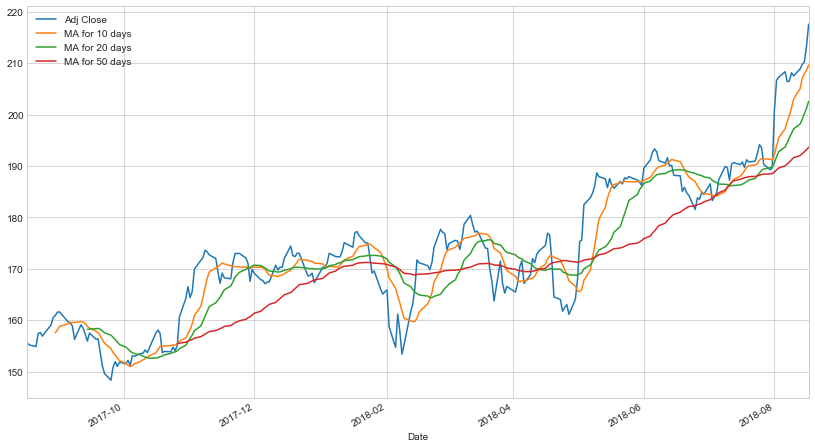

In [11]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(14,8))
plt.show()
# Subplot = False, because we want all plot in a single graph, otherwise it would plot different plots for each column

# Section 2 - Daily Return Analysis

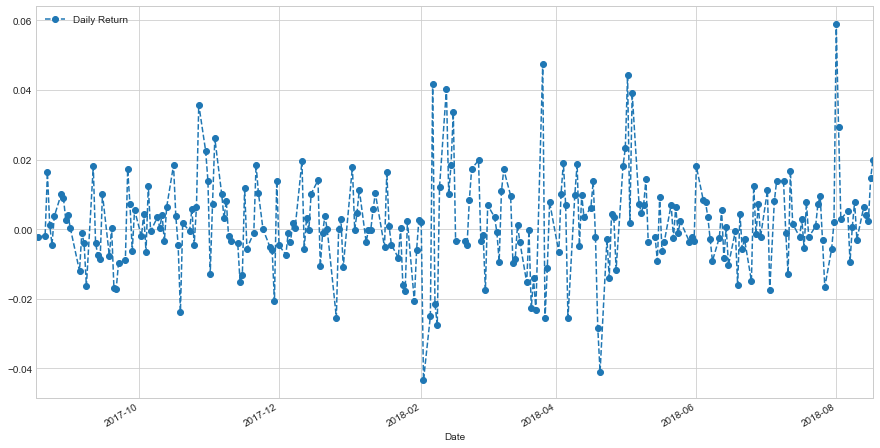

In [12]:
# We'll use pct_change to find the percent change for each day
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
AAPL['Daily Return'].plot(figsize = (15,8), legend= True, linestyle='--', marker ='o')
plt.show()

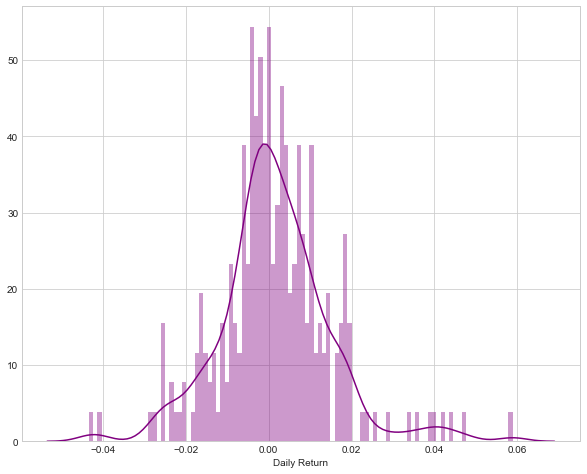

In [13]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
fig, ax = plt.subplots(figsize=(10,8))
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple', ax=ax)
plt.show()

If we wanted to analyze the returns of all the stocks in our list, we need to build a DataFrame with all the ['Close'] columns for each of the stocks dataframes.

In [14]:
closing_df = DataReader(tech_list, 'yahoo', start,end)['Adj Close']

In [15]:
closing_df.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2017-08-17,155.508698,960.570007,910.979980,71.118286
2017-08-18,155.154068,958.469971,910.669983,71.206688
2017-08-21,154.868378,953.289978,906.659973,70.872696
2017-08-22,157.400101,966.900024,924.690002,71.864822
2017-08-23,157.597107,958.000000,927.000000,71.432610


Now that we have all the closing prices, let's go ahead and get the daily return for all the stocks, like the Apple stock.

In [16]:
# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()

tech_rets.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2017-08-17,NaN,NaN,NaN,NaN
2017-08-18,-0.002280,-0.002186,-0.000340,0.001243
2017-08-21,-0.001841,-0.005404,-0.004403,-0.004690
2017-08-22,0.016348,0.014277,0.019886,0.013999
2017-08-23,0.001252,-0.009205,0.002498,-0.006014


Now we can compare the daily percentage return of two stocks to check how correlated. First let's see a sotck compared to itself.

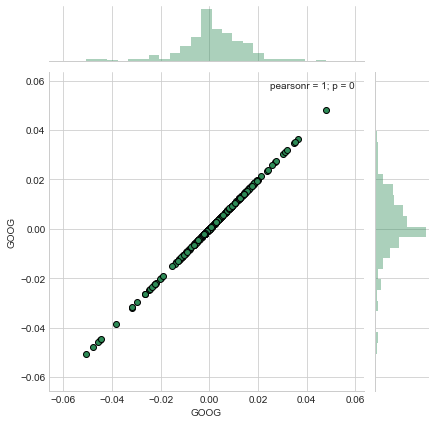

In [17]:
# Comparing Google to itself should show a perfectly linear relationship

sns.jointplot('GOOG','GOOG',tech_rets,kind='scatter',color='seagreen', linewidths=1, edgecolor= 'k')

So now we can see that if two stocks are perfectly (and positivley) correlated with each other a linear relationship bewteen its daily return values should occur. So let's go ahead and compare Google and Microsoft the same way.

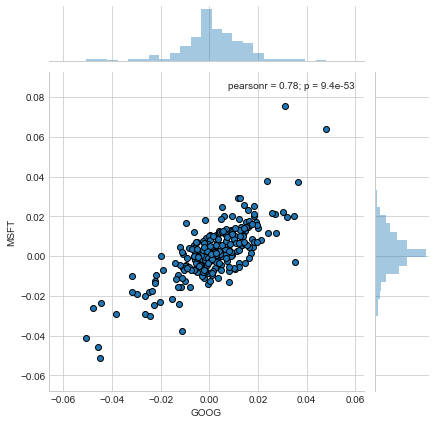

In [18]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot('GOOG', 'MSFT', tech_rets, kind= 'scatter', linewidths=1, edgecolor= 'k')
plt.show()

Pearson value is good, meaning it is strong positive correlation between Google and Microsoft closing prices

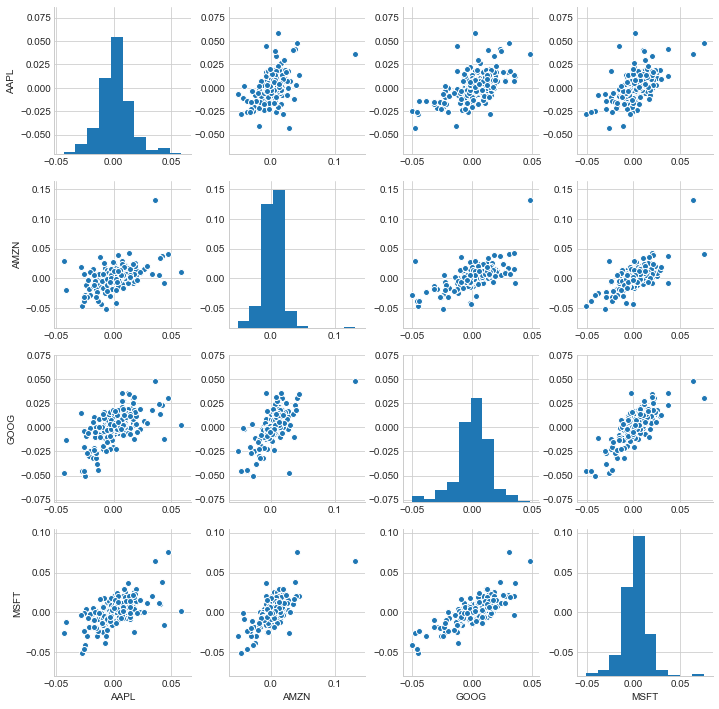

In [19]:
sns.pairplot(tech_rets.dropna())

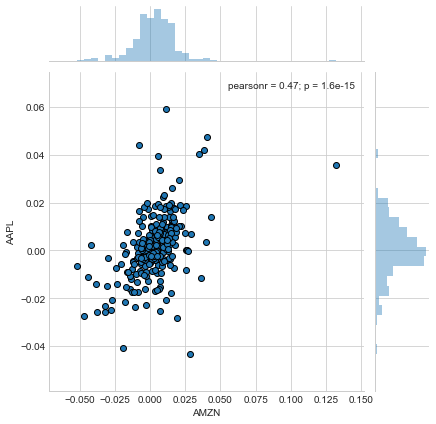

In [20]:
sns.jointplot('AMZN', 'AAPL', tech_rets, kind= 'scatter', linewidths=1, edgecolor= 'k')
plt.show()

There is a weak correlation between Amazon and Apple

We could have also analyzed the correlation of the closing prices using this exact same technique. Here it is shown, the code repeated from above with the exception of the DataFrame called.

C:\Users\ARJ\Anaconda2\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'color', 'label'
  s)


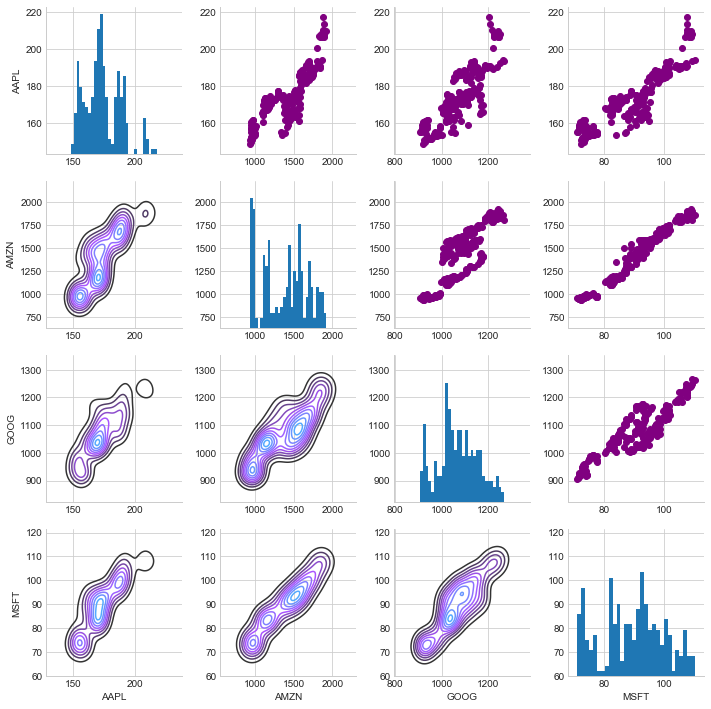

In [21]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter, color= 'purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the closing price
returns_fig.map_diag(plt.hist,bins=30)

Finally, we could also do a correlation plot, to get actual numerical values for the correlation between the stocks' daily return values. By comparing the closing prices, we see an interesting relationship between Microsoft and Apple.

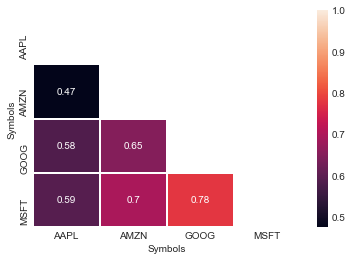

In [22]:
# Let's go ahead and use sebron for a quick correlation plot for the daily returns
corr = tech_rets.dropna().corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr,annot=True, linewidth=1,mask=mask)

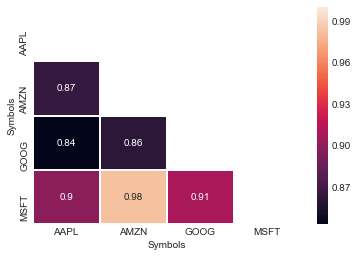

In [23]:
corr_closing = closing_df.dropna().corr()
mask = np.zeros_like(corr_closing, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_closing,annot=True, linewidth=1,mask=mask)

# Risk Analysis

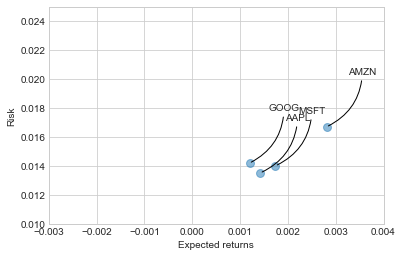

In [32]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_rets DataFrame
rets = tech_rets.dropna()

area = np.pi*20

plt.scatter(rets.mean(), rets.std(),alpha = 0.5,s =area)

# Set the x and y limits of the plot (optional, remove this if you don't see anything in your plot)
plt.ylim([0.01,0.025])
plt.xlim([-0.003,0.004])

#Set the plot axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk')

# Label the scatter plots, for more info on how this is done, chekc out the link below
# http://matplotlib.org/users/annotations_guide.html
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset pixels', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

In [25]:
zip(rets.columns)

[('AAPL',), ('AMZN',), ('GOOG',), ('MSFT',)]

# Value at Risk

Let's go ahead and define a value at risk parameter for our stocks. We can treat value at risk as the amount of money we could expect to lose (aka putting at risk) for a given confidence interval. Theres several methods we can use for estimating a value at risk.

### Value at risk using the "bootstrap" method 

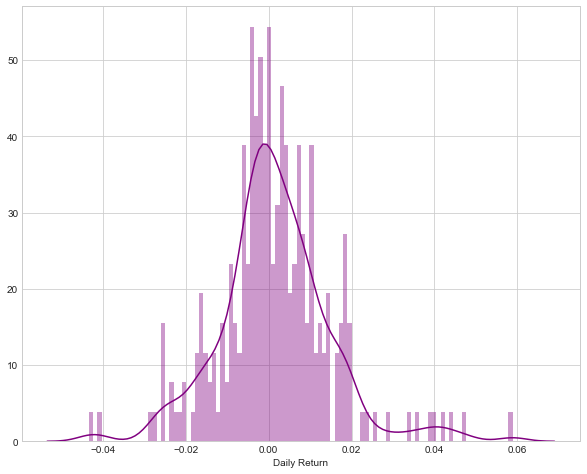

In [38]:
fig, ax = plt.subplots(figsize=(10,8))
sns.distplot(AAPL['Daily Return'].dropna(), bins=100, color = 'purple', ax=ax)

# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn

Now we can use quantile to get the risk value for the stock.

In [40]:
# The 0.05 empirical quantile of daily returns

rets['AAPL'].quantile(0.05)

-0.020718530026279724

The 0.05 empirical quantile of daily returns is at -0.020. That means that with 95% confidence, our worst daily loss will not exceed 2%. If we have a 1 million dollar investment, our one-day 5% VaR is 0.020 * 1,000,000 = $20,000.

### Value at Risk using the Monte Carlo method

Using the Monte Carlo to run many trials with random market conditions, then we'll calculate portfolio losses for each trial. After this, we'll use the aggregation of all these simulations to establish how risky the stock is.

We will use the geometric Brownian motion (GBM), which is technically known as a Markov process. This means that the stock price follows a random walk and is consistent with (at the very least) the weak form of the efficient market hypothesis (EMH): past price information is already incorporated and the next price movement is "conditionally independent" of past price movements.

The equation for geometric Browninan motion is given by the following equation:

ΔS / S= μΔt+σϵ√Δt

Where S is the stock price, mu is the expected return (which we calculated earlier),sigma is the standard deviation of the returns, t is time, and epsilon is the random variable.

We can mulitply both sides by the stock price (S) to rearrange the formula and solve for the stock price.

ΔS=S(μΔt+σϵ√Δt)

Now we see that the change in the stock price is the current stock price multiplied by two terms. The first term is known as "drift", which is the average daily return multiplied by the change of time. The second term is known as "shock", for each tiem period the stock will "drift" and then experience a "shock" which will randomly push the stock price up or down. By simulating this series of steps of drift and shock thousands of times, we can begin to do a simulation of where we might expect the stock price to be.

In [41]:
# Set up our time horizon
days= 365

# Delta
dt = 1/365

# Now let's grab our mu (drift) from the expected return data we got for AAPL
mu = rets.mean()['GOOG']

# Now let's grab the volatility of the stock from the std() of the average return
sigma = rets.std()['GOOG']

In [42]:
def stock_monte_carlo(start_price,days,mu,sigma):
    ''' This function takes in starting stock price, days of simulation,mu,sigma, and returns simulated price array'''
    
    # Define a price array
    price = np.zeros(days)
    price[0] = start_price
    
    # Schok and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in xrange(1,days):
        
        # Calculate Shock
        shock[x] = np.random.normal(loc=mu * dt, scale =sigma * np.sqrt(dt))
        
        # Calculate Drift
        drift[x] = mu * dt
        
        # Calculate Price
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

Text(0.5,1,u'Monte Carlo Analysis for Google')

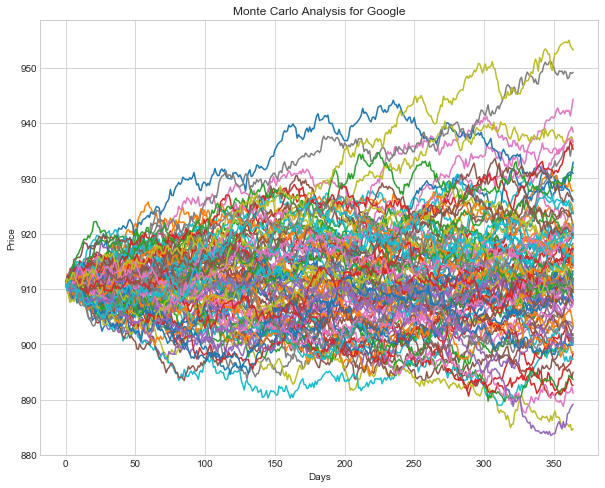

In [51]:
# Get start price from GOOG.head()
fig, ax = plt.subplots(figsize=(10,8))

start_price = 910.97

for run in xrange(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma)) 
plt.legend()
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Google')

Let's go ahead and get a histogram of the end results for a much larger run.

In [52]:
# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

# Set the print options of numpy to only display 0-5 points from an array to suppress output
np.set_printoptions(threshold=5)

for run in xrange(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1];

Now that we have our array of simulations, we can go ahead and plot a histogram ,as well as use qunatile to define our risk for this stock.

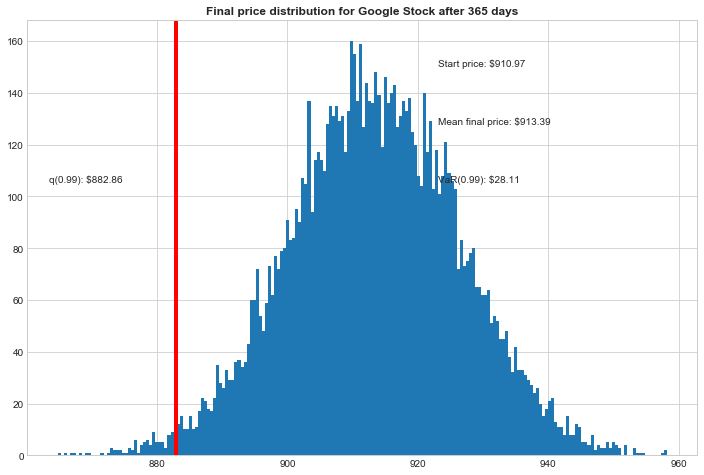

In [56]:
# Now we'lll define q as the 1% empirical qunatile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations, 1)

# Now let's plot the distribution of the end prices
fig, ax = plt.subplots(figsize=(12,8))
plt.hist(simulations,bins=200)

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold');

Now we have looked at the 1% empirical quantile of the final price distribution to estimate the Value at Risk for the Google stock, which looks to be $28.11 for every investment of 910.97 (the price of one inital google stock).